# Analysis Noun Class in R

This code is main edited by Enze Wang

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to do test for business on whether add some serview or food to incease star rating. 

In [1]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(DAAG)){
  install.packages("DAAG")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}
if (!require(olsrr)){
  install.packages("olsrr")
}
if (!require(regclass)){
  install.packages("regclass")
}
if (!require(pROC)){
  install.packages("pROC")
}

Loading required package: ggplot2

Loading required package: DAAG

Loading required package: lattice

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: grid

Loading required package: gridExtra

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DAAG’:

    vif


Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: leaps

Loading required package: caret

Loading required package: psych


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: broom

Loading required package: gbm

Loaded gbm 2.1.8

Loading required package: randomForest

randomFor

In [2]:
Word_Matrix_Data=read.csv("data/Word_Count_Matrix.csv")
Review=read.csv("data/pizza_review.csv")
Noun_Variables_Translate=read.csv("data/Noun_Variables_Translate.csv")

In [3]:
ID_test=Word_Matrix_Data$review_id==Review$review_id
for(i in ID_test){
    if(i==FALSE){
        print(i)
    }
}

In [4]:
Review

X,review_id,user_id,business_id,stars,useful,funny,cool,text,date
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
0,hfXVxrlD6fr1kXfz6sR13Q,7nIzgNF7YzI-UAyYr3y9hw,J9f-9Prw2YVM-fiZqv2fmQ,2,0,1,1,"Parking is tough to get here so I don't get to go much. I also get a little cautious sometimes as they frequently have multiple questionable looking characters. Pro's: - Legendary fries that used to be super huge and gave you great value for your buck - Good burgers - If you drink, it looks like they have a lot of different kinds of alcohol Con's: - Customer Service? Hahaha. Not here. If you can get more than a fart out of one of the twin's working there, you are ahead of the pack. - Dirty, messy tables, crap everywhere. - Many questionable characters here. Someone once asked me if I wanted to buy stolen jewelry off them while I was eating. I'm being totally honest too. - Their french fry portions have gotten smaller. They used to need two baskets for a large fry and now only need one. - Really expensive hot dogs. - They have strict limits on ketchup. No I'm not joking. 2 for large fries, 1 for anything less. I do recommend getting their legendary fries at least once and I do recommend the egg burger, but get it to go and go when it is light out.",2013-09-04 04:35:27
1,EDQpLLFiAxeSxWI5ipwzBQ,SkueY7hVsyXmYItELoodGw,lpel3pRFAzlow7u2TJMz4Q,4,3,0,0,"The server had an extensive knowledge of wines & their various menu selections and it was clear that we were her top priority. The pizza and dessert were amazing. My only complaint is that the chairs were uncomfortable, I think they could add some more comfortable seating to give this more of a ""wine bar"" feel. Otherwise everything was amazing!",2015-04-28 19:28:12
2,RWmT90rP7wYo57dG1cyvww,n3ahpmnEXsZYj3nbVMoUmg,Zja7ykq3icDzkN20XX6j1w,5,1,0,1,"Fast Forward Every trip from NYC to Pitt includes a visit to Aiello's. And if we know anyone driving East, we request a transfer! If you are in search of fancy ""gourmet"" pizza, go elsewhere. At Aiello's, you order the pizza you specify - and it is absolutely perfect!",2013-07-12 23:08:35
3,0jduztItUhOh3FzKGjMxZQ,lVbPEaNUxFjwUydjentrYw,hr0vxeTzlHx6fTpSSmu2AA,5,1,0,0,"By far my favorite Cleveland/Akron restaurant! Great food, very consistent. Bartenders are always great. If it is on the menu... Try it. Only the Navajo tacos have been so so. Everything else is outstanding.",2013-12-07 01:09:23
4,sxfmzhMvZ8LlI1x4fhNjKg,SQKRGzDa7qd8qHb13Z2-Hg,F4kjKxXXyn3e-BYVb1mWcg,4,0,0,0,All food is good here I usually get the Italian sub or pizza. Would recommend. Very busy on Friday and Saturday. If you can pick it up usually takes about an hour for delivery. And if you order sides of sauces make sure you get usually they forget to put in my bag.,2014-10-27 01:42:40
5,Mp7qXWexqoSqKbNh7dYhJg,jAYIkCIqhDgQcp7PG8z_vA,J9f-9Prw2YVM-fiZqv2fmQ,5,1,0,0,"Fries are cooked to perfection....very crispy. Portions are out of this world. Don't waste your time on a small or medium, you'll regret not having more. Hot Dogs & Burgers were very good. Secure Parking is available around the corner at S Bouquet St & Sennott St for a few bucks.",2015-05-26 07:45:02
6,5e_JUyKVFpYxl9qHp1MG1Q,w1LWJ4l7jDeMNmmgIUKZyg,7xHbnGo4MXFkBm6gYSu_xg,2,1,0,0,"The pizza was great, but the guys that make it , while we were there they were scratching their heads, taking their hats off to run fingers through their hair. And one guy that was cutting up something was eating. They need to wash their hands after scratching. Will not be back to this one",2018-05-02 18:55:11
7,D2oYk9ipsvsYP_ls0aL9kg,9IA3P3DxrZcoAl29IYOloA,eU_713ec6fTGNO4BegRaww,4,0,0,1,"It's on Mt. Washington, but no view. The inside looks like a fire hall set up for a wedding. It is so loud that I sometimes can't hear my dinner partner across the table. But none of that matters when you taste the food. The pasta is outstanding, and served in enormous, enormous portions. The menu is a bit cryptic - dishes aren't really described, only named,

In [5]:
Word_Matrix_Data

X,review_id,pizza,food,cheese,sauce,service,salad,restaurant,crust,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,hfXVxrlD6fr1kXfz6sR13Q,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,EDQpLLFiAxeSxWI5ipwzBQ,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,RWmT90rP7wYo57dG1cyvww,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0jduztItUhOh3FzKGjMxZQ,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
4,sxfmzhMvZ8LlI1x4fhNjKg,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Mp7qXWexqoSqKbNh7dYhJg,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,5e_JUyKVFpYxl9qHp1MG1Q,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,D2oYk9ipsvsYP_ls0aL9kg,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,CKHk7l_VriSEqPbG1PSLTw,1,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
Word_Matrix=data.frame(Word_Matrix_Data[,-c(1,2)])
Rating=Review$stars

In [7]:
Word_Data=cbind(Rating,Word_Matrix)

In [8]:
Word_Data

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Linear Regression

The first method we want to use is linear regression. For example the word "cheese". If its coefficients in regression is positive. Then we hold that the business should provide cheese.  

In [9]:
Linear_Regression=lm(Rating~.,data=Word_Data)

In [10]:
summary(Linear_Regression)


Call:
lm(formula = Rating ~ ., data = Word_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5635 -0.8693  0.2788  1.1536  6.9331 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7839558  0.0087265 433.617  < 2e-16 ***
pizza        -0.0008061  0.0033994  -0.237 0.812561    
food         -0.0872413  0.0066946 -13.032  < 2e-16 ***
cheese       -0.0544523  0.0092338  -5.897 3.72e-09 ***
sauce        -0.0358265  0.0096554  -3.711 0.000207 ***
service      -0.0930966  0.0096994  -9.598  < 2e-16 ***
salad         0.0323700  0.0102510   3.158 0.001591 ** 
restaurant   -0.0403520  0.0103446  -3.901 9.60e-05 ***
crust         0.0837429  0.0113552   7.375 1.66e-13 ***
chicken       0.0068566  0.0110692   0.619 0.535634    
beer          0.0628330  0.0103958   6.044 1.51e-09 ***
menu          0.0482077  0.0121185   3.978 6.96e-05 ***
delivery     -0.2774255  0.0128643 -21.566  < 2e-16 ***
staff         0.2169981  0.0144030  15.066  < 2e-16 ***
p

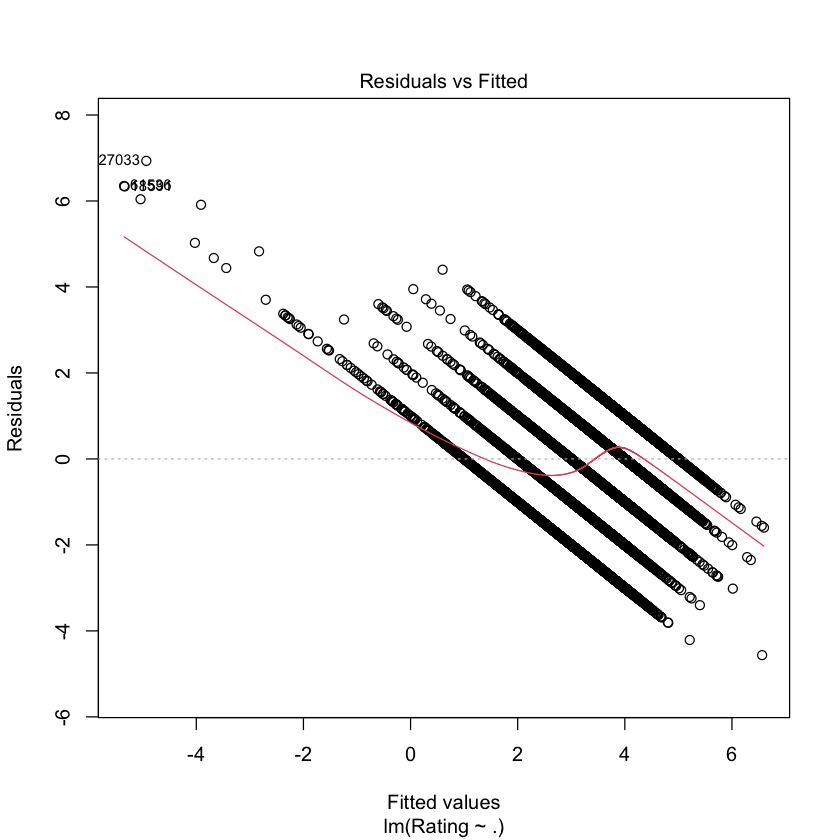

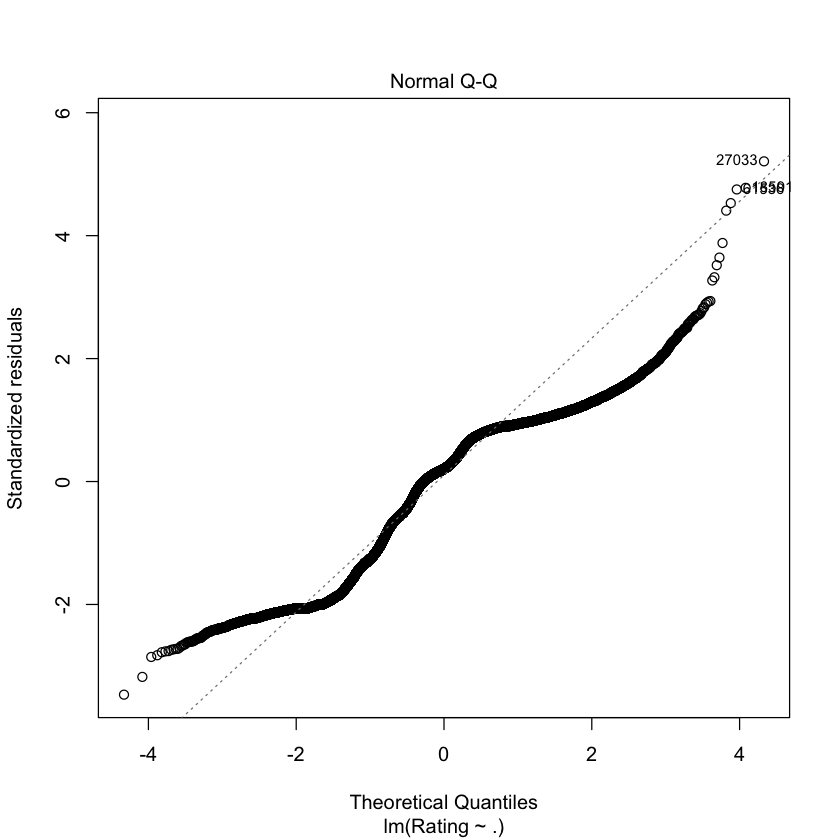

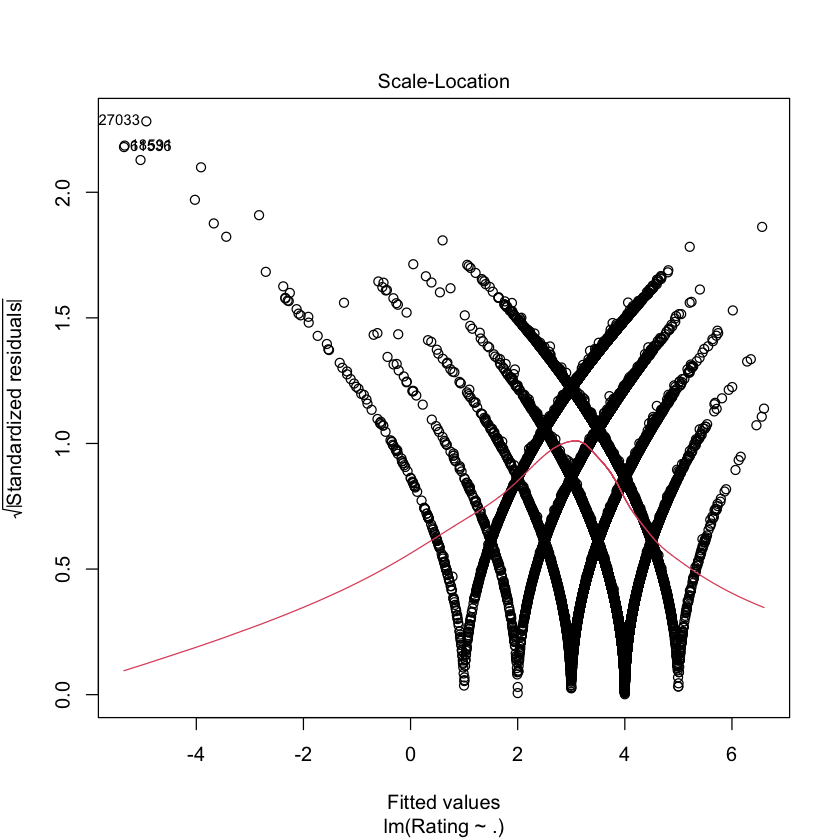

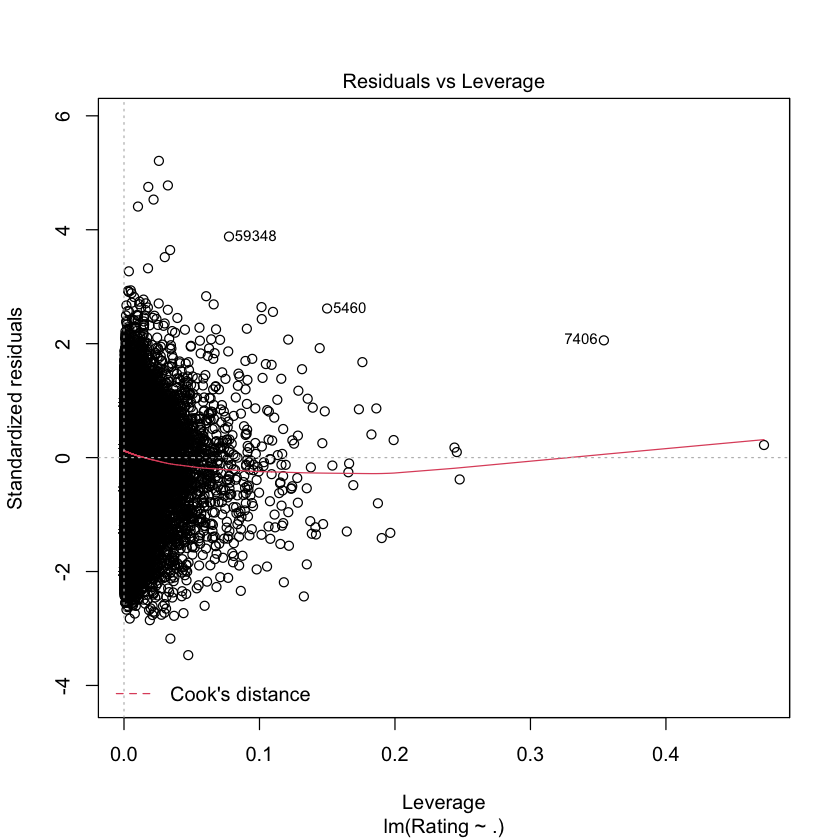

In [11]:
plot(Linear_Regression)

Saving 7 x 7 in image



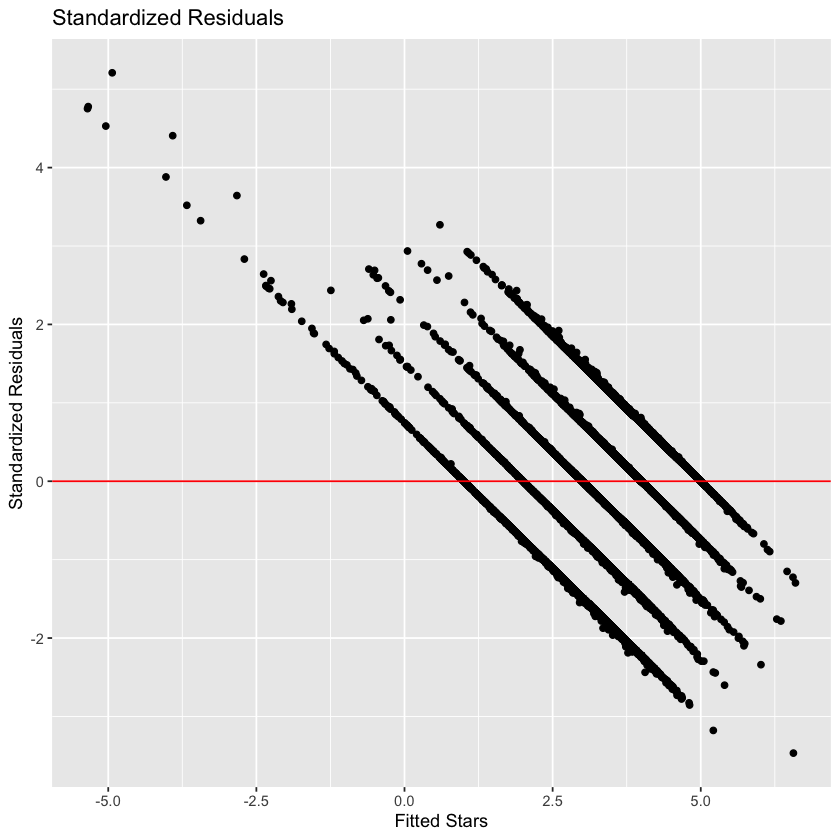

In [12]:

g=ggplot()+
geom_point(aes(x=predict(Linear_Regression),rstandard(Linear_Regression)))+
xlab("Fitted Stars")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
geom_hline(yintercept = 0,color="red")
ggsave("figure/Linear_Regression_Standardized_Residuals.jpeg",g)
g

pdf 
  2

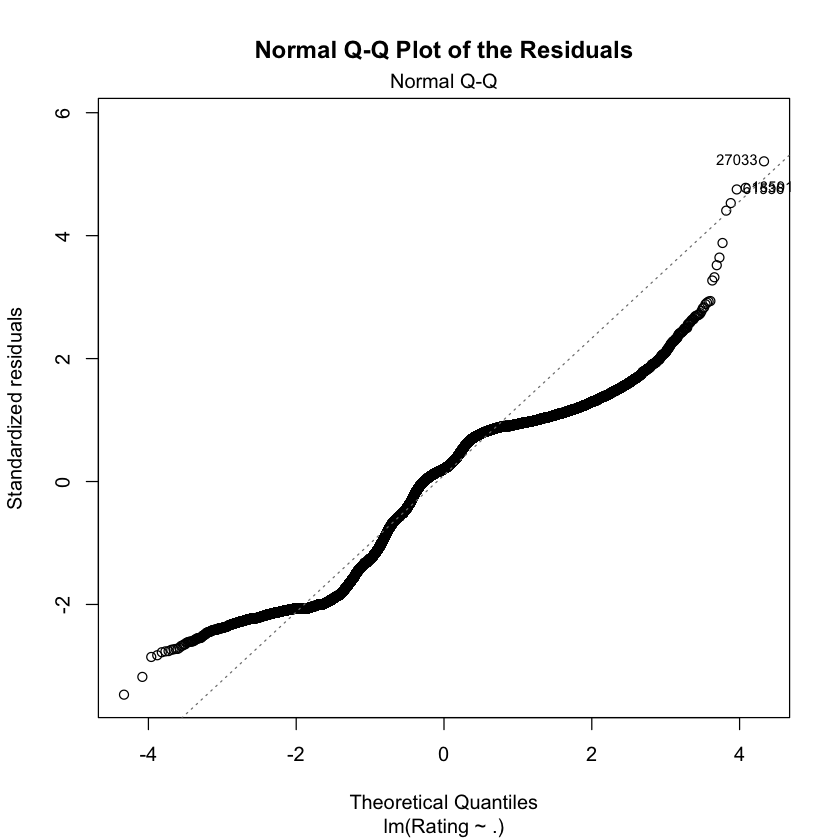

In [13]:
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="figure/Linear_Regression|_QQPLOT.jpeg")
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

As you can see, for assumption of linear regression, our model cannot meets the assumptions well, especially the normality assumptions. Therefore we have no idea whether linear regression is a good method.

In [14]:
Linear_Regression_Results=summary(Linear_Regression)$coefficients
colnames(Linear_Regression_Results)=c("Linear_Coefficients","Linear_STD_Error","Linear_T_Value","Linear_P_Value")
Linear_Regression_Results

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value
(Intercept),3.7839558286,0.008726490,433.6171405,0.000000e+00
pizza,-0.0008060839,0.003399419,-0.2371240,8.125613e-01
food,-0.0872413105,0.006694631,-13.0315329,9.027827e-39
cheese,-0.0544523392,0.009233757,-5.8970949,3.717281e-09
sauce,-0.0358264526,0.009655418,-3.7105024,2.070157e-04
service,-0.0930966007,0.009699394,-9.5981876,8.404023e-22
salad,0.0323699937,0.010250958,3.1577530,1.590608e-03
restaurant,-0.0403520356,0.010344628,-3.9007720,9.598011e-05
crust,0.0837428838,0.011355156,7.3748775,1.663913e-13
chicken,0.0068566153,0.011069212,0.6194312,5.356344e-01


# Lasso Regression

Try use Lasso Regression to select variables. 

In [15]:
Word_Data=as.matrix(Word_Data)

In [16]:
cv.lasso <- cv.glmnet(Word_Data[,-1], Word_Data[,1], alpha = 1, family = "gaussian")

In [17]:
cv.lasso$lambda.1se
coef(cv.lasso, cv.lasso$lambda.1se)

[1] 0.00978885

290 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)   3.792431252
pizza         .          
food         -0.082502075
cheese       -0.031423679
sauce        -0.015868771
service      -0.083857688
salad         0.013756136
restaurant   -0.014681528
crust         0.055520802
chicken       .          
beer          0.057086956
menu          0.042897104
delivery     -0.271258009
staff         0.191147350
price         .          
bread        -0.008240896
dinner        0.032305725
meal          .          
pasta         .          
server       -0.115067252
flavor       -0.024308006
sandwich      .          
lunch         0.036826624
pie           0.103999476
pepperoni     .          
location     -0.108674946
fry           .          
meatball      0.050788217
waitress     -0.336824636
wine          0.089480644
burger        0.013700106
sausage       0.028576906
garlic        .          
meat         -0.019716606
tomato        .          
appetizer     .      

In [18]:
Lasso_Results=data.frame(coef(cv.lasso, cv.lasso$lambda.1se)[-1])
Lasso_Results=rbind(c(coef(cv.lasso, cv.lasso$lambda.1se)[1]),Lasso_Results)
row.names(Lasso_Results)=row.names(Linear_Regression_Results)
colnames(Lasso_Results)=c("Lasso_Coefficients")
Lasso_Results

,Lasso_Coefficients
,<dbl>
(Intercept),3.792431252
pizza,0.000000000
food,-0.082502075
cheese,-0.031423679
sauce,-0.015868771
service,-0.083857688
salad,0.013756136
restaurant,-0.014681528
crust,0.055520802


The Lasso regression give coefficients 0 to those on the boundary of significance.

# Logistic Regression

The third method is logistic regression. Because all review rating is from 1 to 5, in fact we can class rating from 1 and 2 as 0, which means negative rating and rating from 3 to 5 as 1, which means positive rating. We want to use Logistic Regression to find any connection between Rating and Words.

In [19]:
Word_Data=cbind(Rating,Word_Matrix)
Word_Data_log=Word_Data
Word_Data_log$Rating=(sign(Word_Data_log$Rating-2.5)+1)/2
Word_Data_log

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [20]:
Logistic_Regression=glm(Rating~., data = Word_Data_log, family = "binomial")
summary(Logistic_Regression)


Call:
glm(formula = Rating ~ ., family = "binomial", data = Word_Data_log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3792   0.1374   0.5830   0.7171   3.7981  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2373093  0.0166571  74.281  < 2e-16 ***
pizza         0.0040055  0.0066815   0.599 0.548848    
food         -0.1727441  0.0124194 -13.909  < 2e-16 ***
cheese       -0.0965655  0.0178402  -5.413 6.20e-08 ***
sauce        -0.0637613  0.0189364  -3.367 0.000760 ***
service      -0.1151315  0.0178163  -6.462 1.03e-10 ***
salad         0.1002517  0.0210342   4.766 1.88e-06 ***
restaurant   -0.1097289  0.0202070  -5.430 5.63e-08 ***
crust         0.2418311  0.0245528   9.849  < 2e-16 ***
chicken       0.0358547  0.0221402   1.619 0.105353    
beer          0.2883591  0.0248152  11.620  < 2e-16 ***
menu          0.1753211  0.0261458   6.706 2.01e-11 ***
delivery     -0.3691580  0.0220254 -16.761  < 2e-16 ***
staff      

In [21]:
confusion_matrix(Logistic_Regression)

,Predicted 0,Predicted 1,Total
Actual 0,3196,12755,15951
Actual 1,1399,49819,51218
Total,4595,62574,67169


Setting levels: control = 0, case = 1

Setting direction: controls < cases



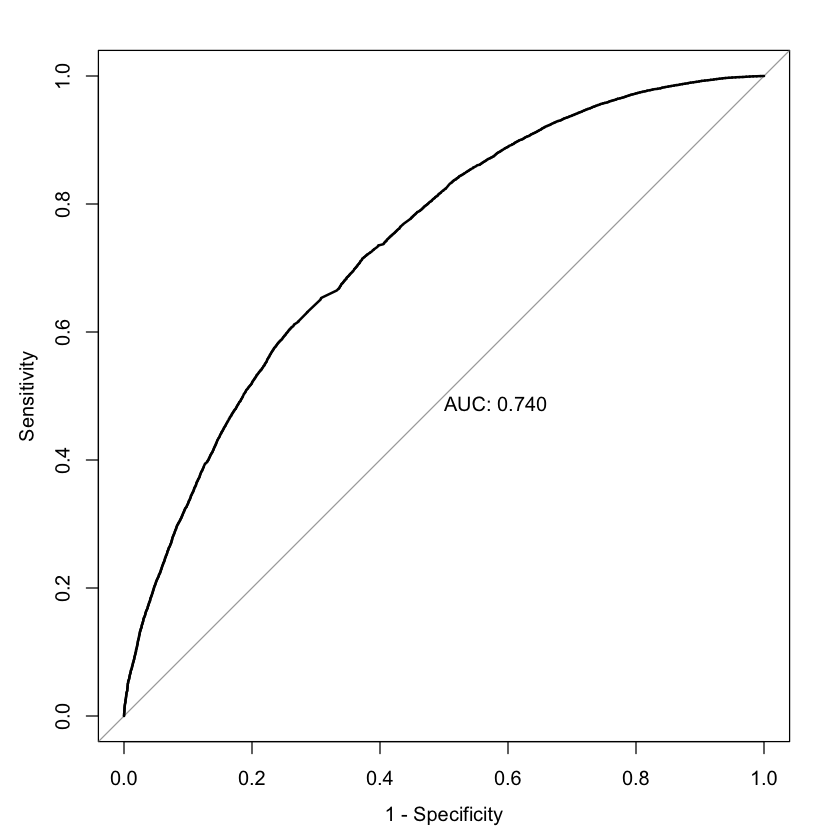

In [22]:
model.ROC = roc(Word_Data_log$Rating~fitted(Logistic_Regression)) 
plot(model.ROC,legacy.axes=T,print.auc=T) 

As you can see in the ROC plots and confusion matrix, the logistic regression perform a little well than linear regression. Because the Y is 0 and 1 but not star rating from 1 to 5. 

In [23]:
Logistic_Regression_Results=summary(Logistic_Regression)$coefficients
colnames(Logistic_Regression_Results)=c("Logistic_Coefficients","Logistic_STD_Error","Logistic_Z_Value","Logistic_P_Value")
Logistic_Regression_Results

,Logistic_Coefficients,Logistic_STD_Error,Logistic_Z_Value,Logistic_P_Value
(Intercept),1.237309308,0.01665706,74.2813785,0.000000e+00
pizza,0.004005497,0.00668154,0.5994871,5.488481e-01
food,-0.172744146,0.01241942,-13.9091991,5.569967e-44
cheese,-0.096565518,0.01784016,-5.4128168,6.204096e-08
sauce,-0.063761340,0.01893645,-3.3671224,7.595696e-04
service,-0.115131457,0.01781629,-6.4621443,1.032296e-10
salad,0.100251657,0.02103422,4.7661217,1.878059e-06
restaurant,-0.109728899,0.02020704,-5.4302306,5.628128e-08
crust,0.241831102,0.02455279,9.8494332,6.893162e-23
chicken,0.035854691,0.02214019,1.6194393,1.053528e-01


In [24]:

Linear_Coef=Linear_Regression_Results[,1]
Lasso_Coef=Lasso_Results[,1]
Logistic_Coef=Logistic_Regression_Results[,1]
Linear_Sig=Linear_Regression_Results[,4]<0.05
Logistic_Sig=Logistic_Regression_Results[,4]<0.05
Regression_Results=cbind(Linear_Coef,Lasso_Coef,Logistic_Coef,Linear_Sig,Logistic_Sig)
Regression_Results

,Linear_Coef,Lasso_Coef,Logistic_Coef,Linear_Sig,Logistic_Sig
(Intercept),3.7839558286,3.792431252,1.237309308,1,1
pizza,-0.0008060839,0.000000000,0.004005497,0,0
food,-0.0872413105,-0.082502075,-0.172744146,1,1
cheese,-0.0544523392,-0.031423679,-0.096565518,1,1
sauce,-0.0358264526,-0.015868771,-0.063761340,1,1
service,-0.0930966007,-0.083857688,-0.115131457,1,1
salad,0.0323699937,0.013756136,0.100251657,1,1
restaurant,-0.0403520356,-0.014681528,-0.109728899,1,1
crust,0.0837428838,0.055520802,0.241831102,1,1
chicken,0.0068566153,0.000000000,0.035854691,0,0


As you can see, the significance of Linear and Logistic regression coincide with each other mostly except a little difference. Therefore we take Linear Regression Results as our final results. 

In [25]:
n=length(Regression_Results[,1])
for(i in 1:n){
    Coef=Regression_Results[i,1:3]
    if(Regression_Results[i,4]==1){
    if(max(Coef)*min(Coef)<0){
        print(i)
    }
    }
}

And there is coefficients difference between the three coefficients results. In fact in our suggestion, we do not want to give suggestions numerically. Because if one review contains "cheese" for example, most of them will contains "pizza" but we want to remind business if he provide "cheese" and pay attention to their star rating.  

In [26]:
Regression_Results=Linear_Regression_Results[which(Regression_Results[,4]==1),]

In [27]:
Regression_Results=Regression_Results[-1,]

In [28]:
Regression_Results

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value
food,-0.08724131,0.006694631,-13.031533,9.027827e-39
cheese,-0.05445234,0.009233757,-5.897095,3.717281e-09
sauce,-0.03582645,0.009655418,-3.710502,2.070157e-04
service,-0.09309660,0.009699394,-9.598188,8.404023e-22
salad,0.03236999,0.010250958,3.157753,1.590608e-03
restaurant,-0.04035204,0.010344628,-3.900772,9.598011e-05
crust,0.08374288,0.011355156,7.374878,1.663913e-13
beer,0.06283300,0.010395846,6.044049,1.510856e-09
menu,0.04820771,0.012118466,3.978037,6.955966e-05
delivery,-0.27742548,0.012864257,-21.565605,8.481040e-103


# T Test & Wilcoxon Test

Here we test the significant of difference between star rating with a target noun and without a target noun by T test. To test whether this results coincide with the regression results. Our H0 is the mean star rating of review contains such word or not is equal. The H1 is the mean is not equal. 

In [29]:
Word_Data_New=Word_Data[,c("Rating",row.names(Regression_Results))]
Word_Data_New

Rating,food,cheese,sauce,service,salad,restaurant,crust,beer,menu,⋯,espresso,blt,pudding,dumpling,bourbon,syrup,biscuit,pepsi,fryer,peach
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [30]:
T_Test_P_Value=c()
Mean_Difference=c()
Word=c()
for(i in 2:(length(Word_Data_New))){
    Rating_With=Word_Data_New[which(Word_Data_New[,i]>0),]$Rating
    Rating_Without=Word_Data_New[which(Word_Data_New[,i]==0),]$Rating
    if(length(Rating_With)>30 & length(Rating_Without)>30){
    Word=c(Word,colnames(Word_Data_New)[i])
    T_Test_P_Value=c(T_Test_P_Value,t.test(Rating_With,Rating_Without,alternative = c("two.sided"),mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)$p.value)
    Mean_Difference=c(Mean_Difference,mean(Rating_With)-mean(Rating_Without))

    }
    else{
    print(colnames(Word_Data_New)[i])
    }
}

In [31]:
T_Sig=T_Test_P_Value<0.05

In [32]:
T_Results=cbind(Word,T_Test_P_Value,Mean_Difference,T_Sig)

In [33]:
T_Results=cbind(1:length(T_Results[,1]),T_Results)

In [34]:
T_Results

,Word,T_Test_P_Value,Mean_Difference,T_Sig
1,food,3.61500957981833e-46,-0.165954551225373,TRUE
2,cheese,0.287968094385546,0.014924440561082,FALSE
3,sauce,0.0437069072307055,0.0277073386957349,TRUE
4,service,6.46860929640691e-55,-0.202966058184119,TRUE
5,salad,2.67430027661055e-13,0.110601181476285,TRUE
6,restaurant,2.39407766852098e-17,-0.13683274153601,TRUE
7,crust,1.21503791738754e-80,0.262651059169918,TRUE
8,beer,2.01025986285431e-54,0.245844415670733,TRUE
9,menu,1.07184981667109e-21,0.146445175664263,TRUE
10,delivery,8.35605473445111e-115,-0.528956370546414,TRUE


In [35]:
row.names(Regression_Results)==T_Results[,2]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

No word deleted for size too small.

In [36]:
for(i in 1:length(T_Results[,1])){
    if(as.numeric(T_Results[i,4])*as.numeric(Regression_Results[i,1])<0){
        print(i)
    }
}

[1] 2
[1] 3
[1] 15
[1] 29


There are some results of T test does not coincide with Linear regression, but all four of them are on the boundary of significance. Therefore we still hold the results of linear regression.

Because our suggestion for this part is something like:

You should add XXX service, our study show that review contains XXX usually have high star rating. 

Therefore, we will remove some terms which almost every pizza business have or has no value for suggestion. For example, it is difficult to suggest business to avoid salt and sugger. 

In [37]:


Final_Results=Regression_Results[row.names(Regression_Results)%in%c(
"beer",
"pepperoni",
"meatball",
"wine",
"sausage",
"mushroom",
"pepper",
"dessert",
"bacon",
"mozzarella",
"shrimp",
"gluten",
"parmesan",
"spinach",
"spaghetti",
"lettuce",
"lasagna",
"gelato",
"cocktail",
"gnocchi",
"pesto",
"margherita",
"ricotta",
"rib",
"margarita",
"caesar",
"honey",
"noodle",
"tiramisu",
"cider",
"zucchini",
"donut",
"broccoli",
"balsamic",
"turkey",
"cannoli",
"cauliflower",
"seasoning",
"hummus",
"cooky",
"ketchup",
"savory",
"carbonara",
"truffle",
"cheddar",
"peanut",
"patty",
"cracker",
"grape",
"sangria",
"candy",
"chipotle",
"crouton",
"lemonade",
"espresso",
"pudding",
"dumpling",
"bourbon",
"fryer",
"peach"),]

In [38]:
Final_Results
write.csv(Final_Results,"data/Results_Analysis_Noun_Class.csv")

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value
beer,0.06283300,0.01039585,6.044049,1.510856e-09
pepperoni,0.03237531,0.01582729,2.045537,4.080582e-02
meatball,0.07546369,0.01457933,5.176072,2.272592e-07
wine,0.10607035,0.01568186,6.763890,1.354361e-11
sausage,0.06247278,0.01952974,3.198854,1.380396e-03
mushroom,-0.06262099,0.02069502,-3.025896,2.479914e-03
pepper,0.04383375,0.02128563,2.059312,3.946823e-02
dessert,0.12677591,0.02389963,5.304513,1.133325e-07
bacon,0.08872305,0.02513558,3.529779,4.161864e-04
mozzarella,0.09063916,0.02907223,3.117723,1.823314e-03


Here we provide the results from both regression and T test, from both we can test some the difference between the star rating of reviews contains such word or not. For example, "beer" and "wine" is positive with star rating, which means that offer beer and wine may increase review star rating. This results coincide with business analysis following. For all words, we will give suggestion in Shiny app. 